In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import tensorflow as tf
import keras.backend.tensorflow_backend as KTF

def get_session(gpu_fraction=0.3):
    '''Assume that you have 6GB of GPU memory and want to allocate ~2GB'''

    num_threads = os.environ.get('OMP_NUM_THREADS')
    gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=gpu_fraction)

    if num_threads:
        return tf.Session(config=tf.ConfigProto(
            gpu_options=gpu_options, intra_op_parallelism_threads=num_threads))
    else:
        return tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))


KTF.set_session(get_session())

Using TensorFlow backend.


In [3]:
!nvidia-smi

Mon Nov 20 16:25:16 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.90                 Driver Version: 384.90                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    76W / 149W |   3519MiB / 11439MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [4]:
import os
import re
import json

import unet
import dataset
import train_test_loader
import learning_experiment as lexperiment

import datetime

from shutil import copyfile

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
DESCRIPTION = u"""
Предобученную сеть из Experiment_2017_11_19_15, которая работает по 8 каналам доучиваем на небольшом lr~1e-5
"""
experiment = lexperiment.create_experiment(DESCRIPTION, 
                               dataset.DataSet("./dataset/trainset", [dataset.ChannelMUL_PanSharpen], image_size=(240,240)))

Create experiment in directory: ./experiments/2017-11-20 16:26:32.860734


In [6]:
data_set = experiment.data_set

In [7]:
train_ids, test_ids = train_test_loader.load_train_test()

In [8]:
experiment15 = lexperiment.LearningExperiment('./experiments/2017-11-19 20:24:09.369767')

In [11]:
net = experiment15.load_net(input_shape=(240,240,8))

In [12]:
from keras.optimizers import Adam, Nadam

In [13]:
net.compile(optimizer=Adam(lr=1e-5), loss='binary_crossentropy')

In [14]:
batch_generator = lexperiment.BatchGenerator(data_set, train_ids, 
                                      random_rotate=True, 
                                      shuffle_on_each_epoch=True, 
                                      random_translate=True)

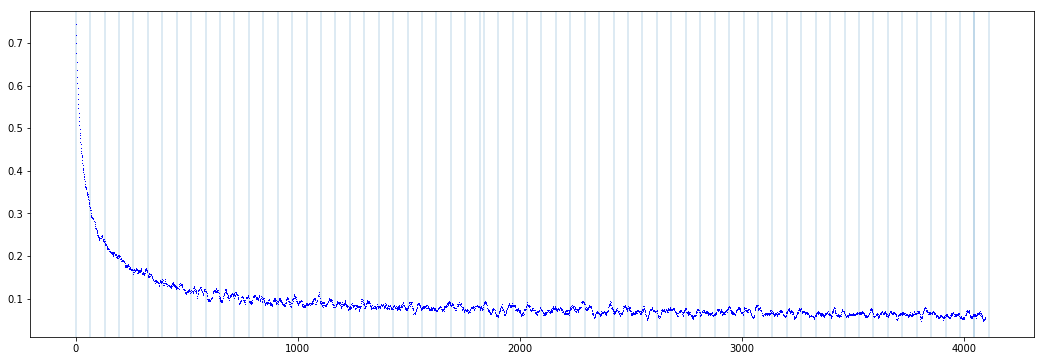

In [22]:
plt.figure(figsize=(18,6))
lexperiment.plot_loss(net, window_size=15)

In [23]:
experiment.train(net, batch_generator, epochs=60)

epoch: 65, loss: 0.078945
epoch: 65, loss: 0.037261
epoch: 65, loss: 0.029248
epoch: 65, loss: 0.053621
epoch: 65, loss: 0.026539
epoch: 65, loss: 0.076144
epoch: 65, loss: 0.107812
epoch: 65, loss: 0.073317
epoch: 65, loss: 0.070186
epoch: 65, loss: 0.104704
epoch: 65, loss: 0.044378
epoch: 65, loss: 0.048267
epoch: 65, loss: 0.078178
epoch: 65, loss: 0.051328
epoch: 65, loss: 0.073162
epoch: 65, loss: 0.064857
epoch: 65, loss: 0.050278
epoch: 65, loss: 0.068478
epoch: 65, loss: 0.047100
epoch: 65, loss: 0.061429
epoch: 65, loss: 0.049104
epoch: 65, loss: 0.054228
epoch: 65, loss: 0.072210
epoch: 65, loss: 0.022542
epoch: 65, loss: 0.021959
epoch: 65, loss: 0.026305
epoch: 65, loss: 0.090893
epoch: 65, loss: 0.030392
epoch: 65, loss: 0.077132
epoch: 65, loss: 0.073806
epoch: 65, loss: 0.024524
epoch: 65, loss: 0.064821
epoch: 65, loss: 0.086404
epoch: 65, loss: 0.078744
epoch: 65, loss: 0.036474
epoch: 65, loss: 0.088269
epoch: 65, loss: 0.042398
epoch: 65, loss: 0.096491
epoch: 65, l

epoch: 69, loss: 0.085374
epoch: 69, loss: 0.092327
epoch: 69, loss: 0.067805
epoch: 69, loss: 0.033042
epoch: 69, loss: 0.066662
epoch: 69, loss: 0.021102
epoch: 69, loss: 0.051555
epoch: 69, loss: 0.031996
epoch: 69, loss: 0.072282
epoch: 70, loss: 0.044814
epoch: 70, loss: 0.024862
epoch: 70, loss: 0.045285
epoch: 70, loss: 0.069698
epoch: 70, loss: 0.076541
epoch: 70, loss: 0.053417
epoch: 70, loss: 0.077989
epoch: 70, loss: 0.067545
epoch: 70, loss: 0.052561
epoch: 70, loss: 0.067778
epoch: 70, loss: 0.044260
epoch: 70, loss: 0.079737
epoch: 70, loss: 0.049252
epoch: 70, loss: 0.056547
epoch: 70, loss: 0.048887
epoch: 70, loss: 0.050576
epoch: 70, loss: 0.041507
epoch: 70, loss: 0.017148
epoch: 70, loss: 0.058924
epoch: 70, loss: 0.067276
epoch: 70, loss: 0.064515
epoch: 70, loss: 0.043872
epoch: 70, loss: 0.039871
epoch: 70, loss: 0.078956
epoch: 70, loss: 0.050805
epoch: 70, loss: 0.069587
epoch: 70, loss: 0.060602
epoch: 70, loss: 0.048123
epoch: 70, loss: 0.062430
epoch: 70, l

epoch: 74, loss: 0.044261
epoch: 74, loss: 0.018395
epoch: 74, loss: 0.063287
epoch: 74, loss: 0.074625
epoch: 74, loss: 0.043202
epoch: 74, loss: 0.035807
epoch: 74, loss: 0.038987
epoch: 74, loss: 0.061865
epoch: 74, loss: 0.059818
epoch: 74, loss: 0.031631
epoch: 74, loss: 0.031281
epoch: 74, loss: 0.033753
epoch: 74, loss: 0.063394
epoch: 74, loss: 0.077746
epoch: 74, loss: 0.035077
epoch: 74, loss: 0.037634
epoch: 74, loss: 0.031866
epoch: 74, loss: 0.015278
epoch: 75, loss: 0.035786
epoch: 75, loss: 0.029640
epoch: 75, loss: 0.114513
epoch: 75, loss: 0.071924
epoch: 75, loss: 0.057322
epoch: 75, loss: 0.085248
epoch: 75, loss: 0.047095
epoch: 75, loss: 0.063251
epoch: 75, loss: 0.074904
epoch: 75, loss: 0.032825
epoch: 75, loss: 0.046480
epoch: 75, loss: 0.045917
epoch: 75, loss: 0.038251
epoch: 75, loss: 0.027493
epoch: 75, loss: 0.077640
epoch: 75, loss: 0.067127
epoch: 75, loss: 0.036650
epoch: 75, loss: 0.065328
epoch: 75, loss: 0.045311
epoch: 75, loss: 0.043003
epoch: 75, l

epoch: 79, loss: 0.056436
epoch: 79, loss: 0.017157
epoch: 79, loss: 0.037676
epoch: 79, loss: 0.071139
epoch: 79, loss: 0.056168
epoch: 79, loss: 0.065882
epoch: 79, loss: 0.082831
epoch: 79, loss: 0.064553
epoch: 79, loss: 0.022764
epoch: 79, loss: 0.064750
epoch: 79, loss: 0.010370
epoch: 79, loss: 0.052695
epoch: 79, loss: 0.038630
epoch: 79, loss: 0.061665
epoch: 79, loss: 0.038503
epoch: 79, loss: 0.043323
epoch: 79, loss: 0.024791
epoch: 79, loss: 0.052201
epoch: 79, loss: 0.043751
epoch: 79, loss: 0.053664
epoch: 79, loss: 0.019227
epoch: 79, loss: 0.038436
epoch: 79, loss: 0.060109
epoch: 79, loss: 0.087536
epoch: 79, loss: 0.059228
epoch: 79, loss: 0.059057
epoch: 79, loss: 0.010079
epoch: 80, loss: 0.088164
epoch: 80, loss: 0.083579
epoch: 80, loss: 0.058929
epoch: 80, loss: 0.051758
epoch: 80, loss: 0.070318
epoch: 80, loss: 0.035499
epoch: 80, loss: 0.074571
epoch: 80, loss: 0.079294
epoch: 80, loss: 0.064027
epoch: 80, loss: 0.101296
epoch: 80, loss: 0.087478
epoch: 80, l

epoch: 84, loss: 0.005955
epoch: 84, loss: 0.047181
epoch: 84, loss: 0.043741
epoch: 84, loss: 0.030583
epoch: 84, loss: 0.012787
epoch: 84, loss: 0.060131
epoch: 84, loss: 0.046949
epoch: 84, loss: 0.040102
epoch: 84, loss: 0.048590
epoch: 84, loss: 0.053377
epoch: 84, loss: 0.039240
epoch: 84, loss: 0.078170
epoch: 84, loss: 0.040276
epoch: 84, loss: 0.046100
epoch: 84, loss: 0.065966
epoch: 84, loss: 0.046267
epoch: 84, loss: 0.044569
epoch: 84, loss: 0.114879
epoch: 84, loss: 0.049314
epoch: 84, loss: 0.035567
epoch: 84, loss: 0.066584
epoch: 84, loss: 0.027575
epoch: 84, loss: 0.014382
epoch: 84, loss: 0.021621
epoch: 84, loss: 0.056400
epoch: 84, loss: 0.083952
epoch: 84, loss: 0.097707
epoch: 84, loss: 0.057638
epoch: 84, loss: 0.077027
epoch: 84, loss: 0.070229
epoch: 84, loss: 0.045449
epoch: 84, loss: 0.037598
epoch: 84, loss: 0.075104
epoch: 84, loss: 0.054510
epoch: 84, loss: 0.044030
epoch: 84, loss: 0.006045
epoch: 85, loss: 0.041652
epoch: 85, loss: 0.026217
epoch: 85, l

epoch: 89, loss: 0.015756
epoch: 89, loss: 0.044596
epoch: 89, loss: 0.019067
epoch: 89, loss: 0.016895
epoch: 89, loss: 0.046309
epoch: 89, loss: 0.045569
epoch: 89, loss: 0.056153
epoch: 89, loss: 0.060183
epoch: 89, loss: 0.059111
epoch: 89, loss: 0.073356
epoch: 89, loss: 0.102729
epoch: 89, loss: 0.054337
epoch: 89, loss: 0.029943
epoch: 89, loss: 0.062800
epoch: 89, loss: 0.053896
epoch: 89, loss: 0.047212
epoch: 89, loss: 0.059296
epoch: 89, loss: 0.071475
epoch: 89, loss: 0.057397
epoch: 89, loss: 0.074225
epoch: 89, loss: 0.069040
epoch: 89, loss: 0.077034
epoch: 89, loss: 0.075384
epoch: 89, loss: 0.038896
epoch: 89, loss: 0.084055
epoch: 89, loss: 0.049594
epoch: 89, loss: 0.065454
epoch: 89, loss: 0.060056
epoch: 89, loss: 0.065578
epoch: 89, loss: 0.043054
epoch: 89, loss: 0.034547
epoch: 89, loss: 0.063425
epoch: 89, loss: 0.023818
epoch: 89, loss: 0.069126
epoch: 89, loss: 0.054120
epoch: 89, loss: 0.034223
epoch: 89, loss: 0.060034
epoch: 89, loss: 0.041841
epoch: 89, l

epoch: 94, loss: 0.040511
epoch: 94, loss: 0.026885
epoch: 94, loss: 0.048607
epoch: 94, loss: 0.044690
epoch: 94, loss: 0.085737
epoch: 94, loss: 0.042626
epoch: 94, loss: 0.028819
epoch: 94, loss: 0.053633
epoch: 94, loss: 0.092224
epoch: 94, loss: 0.050557
epoch: 94, loss: 0.020796
epoch: 94, loss: 0.026188
epoch: 94, loss: 0.048770
epoch: 94, loss: 0.035787
epoch: 94, loss: 0.036945
epoch: 94, loss: 0.092871
epoch: 94, loss: 0.047645
epoch: 94, loss: 0.072894
epoch: 94, loss: 0.064671
epoch: 94, loss: 0.056291
epoch: 94, loss: 0.046533
epoch: 94, loss: 0.074797
epoch: 94, loss: 0.048058
epoch: 94, loss: 0.067173
epoch: 94, loss: 0.085224
epoch: 94, loss: 0.038049
epoch: 94, loss: 0.034667
epoch: 94, loss: 0.082244
epoch: 94, loss: 0.069430
epoch: 94, loss: 0.049953
epoch: 94, loss: 0.064713
epoch: 94, loss: 0.052835
epoch: 94, loss: 0.040292
epoch: 94, loss: 0.050779
epoch: 94, loss: 0.039438
epoch: 94, loss: 0.074941
epoch: 94, loss: 0.041710
epoch: 94, loss: 0.126467
epoch: 94, l

epoch: 99, loss: 0.063985
epoch: 99, loss: 0.036767
epoch: 99, loss: 0.014461
epoch: 99, loss: 0.044754
epoch: 99, loss: 0.053408
epoch: 99, loss: 0.060251
epoch: 99, loss: 0.040006
epoch: 99, loss: 0.065448
epoch: 99, loss: 0.086216
epoch: 99, loss: 0.054717
epoch: 99, loss: 0.056984
epoch: 99, loss: 0.048597
epoch: 99, loss: 0.054866
epoch: 99, loss: 0.081334
epoch: 99, loss: 0.057858
epoch: 99, loss: 0.072644
epoch: 99, loss: 0.067034
epoch: 99, loss: 0.072567
epoch: 99, loss: 0.055880
epoch: 99, loss: 0.074466
epoch: 99, loss: 0.053127
epoch: 99, loss: 0.019201
epoch: 99, loss: 0.089974
epoch: 99, loss: 0.037360
epoch: 99, loss: 0.079569
epoch: 99, loss: 0.077781
epoch: 99, loss: 0.048414
epoch: 99, loss: 0.064051
epoch: 99, loss: 0.049390
epoch: 99, loss: 0.064007
epoch: 99, loss: 0.062792
epoch: 99, loss: 0.045195
epoch: 99, loss: 0.089654
epoch: 99, loss: 0.057016
epoch: 99, loss: 0.112350
epoch: 99, loss: 0.066745
epoch: 99, loss: 0.037657
epoch: 99, loss: 0.071801
epoch: 99, l

epoch: 103, loss: 0.063027
epoch: 103, loss: 0.053551
epoch: 103, loss: 0.057462
epoch: 103, loss: 0.026138
epoch: 103, loss: 0.040182
epoch: 103, loss: 0.046247
epoch: 103, loss: 0.034281
epoch: 103, loss: 0.035377
epoch: 103, loss: 0.068654
epoch: 103, loss: 0.071880
epoch: 103, loss: 0.033171
epoch: 103, loss: 0.047779
epoch: 103, loss: 0.049367
epoch: 103, loss: 0.042043
epoch: 103, loss: 0.039279
epoch: 103, loss: 0.059806
epoch: 103, loss: 0.074133
epoch: 104, loss: 0.022289
epoch: 104, loss: 0.062848
epoch: 104, loss: 0.045445
epoch: 104, loss: 0.057157
epoch: 104, loss: 0.055585
epoch: 104, loss: 0.082532
epoch: 104, loss: 0.061802
epoch: 104, loss: 0.027391
epoch: 104, loss: 0.065830
epoch: 104, loss: 0.086485
epoch: 104, loss: 0.042578
epoch: 104, loss: 0.047045
epoch: 104, loss: 0.051457
epoch: 104, loss: 0.035098
epoch: 104, loss: 0.048507
epoch: 104, loss: 0.026466
epoch: 104, loss: 0.078121
epoch: 104, loss: 0.022743
epoch: 104, loss: 0.136169
epoch: 104, loss: 0.046736
e

epoch: 108, loss: 0.048647
epoch: 108, loss: 0.039651
epoch: 108, loss: 0.034574
epoch: 108, loss: 0.025026
epoch: 108, loss: 0.065283
epoch: 108, loss: 0.050349
epoch: 108, loss: 0.033584
epoch: 108, loss: 0.081004
epoch: 108, loss: 0.050601
epoch: 108, loss: 0.046129
epoch: 108, loss: 0.052893
epoch: 108, loss: 0.043899
epoch: 108, loss: 0.072416
epoch: 108, loss: 0.026798
epoch: 108, loss: 0.082599
epoch: 108, loss: 0.073543
epoch: 108, loss: 0.028166
epoch: 108, loss: 0.052377
epoch: 108, loss: 0.087705
epoch: 108, loss: 0.029478
epoch: 108, loss: 0.061844
epoch: 108, loss: 0.036486
epoch: 108, loss: 0.072873
epoch: 108, loss: 0.047610
epoch: 108, loss: 0.041811
epoch: 108, loss: 0.046490
epoch: 108, loss: 0.051850
epoch: 108, loss: 0.023724
epoch: 108, loss: 0.056832
epoch: 108, loss: 0.083402
epoch: 108, loss: 0.043792
epoch: 108, loss: 0.025225
epoch: 108, loss: 0.052812
epoch: 108, loss: 0.034284
epoch: 108, loss: 0.068600
epoch: 108, loss: 0.040284
epoch: 108, loss: 0.045404
e

epoch: 113, loss: 0.038924
epoch: 113, loss: 0.047138
epoch: 113, loss: 0.065897
epoch: 113, loss: 0.027000
epoch: 113, loss: 0.045805
epoch: 113, loss: 0.069994
epoch: 113, loss: 0.052288
epoch: 113, loss: 0.029621
epoch: 113, loss: 0.031479
epoch: 113, loss: 0.021561
epoch: 113, loss: 0.073757
epoch: 113, loss: 0.034691
epoch: 113, loss: 0.022573
epoch: 113, loss: 0.078707
epoch: 113, loss: 0.048193
epoch: 113, loss: 0.063424
epoch: 113, loss: 0.044884
epoch: 113, loss: 0.086962
epoch: 113, loss: 0.066280
epoch: 113, loss: 0.088149
epoch: 113, loss: 0.085731
epoch: 113, loss: 0.039011
epoch: 113, loss: 0.025721
epoch: 113, loss: 0.054466
epoch: 113, loss: 0.041513
epoch: 113, loss: 0.083077
epoch: 113, loss: 0.055899
epoch: 113, loss: 0.064448
epoch: 113, loss: 0.085265
epoch: 113, loss: 0.058871
epoch: 113, loss: 0.029460
epoch: 113, loss: 0.046916
epoch: 113, loss: 0.077653
epoch: 113, loss: 0.034263
epoch: 113, loss: 0.040158
epoch: 113, loss: 0.041492
epoch: 113, loss: 0.052948
e

epoch: 117, loss: 0.067813
epoch: 117, loss: 0.034747
epoch: 117, loss: 0.024944
epoch: 117, loss: 0.064451
epoch: 117, loss: 0.062816
epoch: 117, loss: 0.095710
epoch: 117, loss: 0.020620
epoch: 117, loss: 0.054710
epoch: 117, loss: 0.066380
epoch: 117, loss: 0.079358
epoch: 117, loss: 0.069515
epoch: 117, loss: 0.086739
epoch: 117, loss: 0.060500
epoch: 117, loss: 0.018377
epoch: 117, loss: 0.026471
epoch: 118, loss: 0.073059
epoch: 118, loss: 0.061433
epoch: 118, loss: 0.074383
epoch: 118, loss: 0.026289
epoch: 118, loss: 0.023797
epoch: 118, loss: 0.064794
epoch: 118, loss: 0.039471
epoch: 118, loss: 0.088442
epoch: 118, loss: 0.067818
epoch: 118, loss: 0.042377
epoch: 118, loss: 0.030072
epoch: 118, loss: 0.024447
epoch: 118, loss: 0.045356
epoch: 118, loss: 0.083006
epoch: 118, loss: 0.056235
epoch: 118, loss: 0.093431
epoch: 118, loss: 0.022001
epoch: 118, loss: 0.057661
epoch: 118, loss: 0.066464
epoch: 118, loss: 0.041462
epoch: 118, loss: 0.056551
epoch: 118, loss: 0.074754
e

KeyboardInterrupt: 